In [10]:
# extracting data from the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# compressing  zip file
import zipfile
file_zip = "/content/drive/MyDrive/DATASETS/archive(4).zip"

zip_ref = zipfile.ZipFile(file_zip, "r")
zip_ref.extractall()
zip_ref.close()

In [12]:
# View an image from the dataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
 
  target_folder = target_dir+target_class
  print(target_folder)

  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



/content/BarkVN-50/BarkVN-50_mendeley/Melaleuca
Image shape: (404, 303, 3)


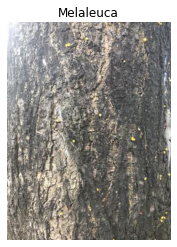

In [13]:
img = view_random_image(target_dir="/content/BarkVN-50/BarkVN-50_mendeley/",
                        target_class="Melaleuca"  )

In [14]:
# data preprocessing  and create test and train data
from tensorflow._api.v2.random import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = "/content/BarkVN-50/BarkVN-50_mendeley"
tf.random.set_seed(42)
datagen = ImageDataGenerator( rescale=1./255 , 
                                    rotation_range = 20 , 
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True , 
            
                                    validation_split=0.2
                                    )
test_datagen = ImageDataGenerator( rescale=1./255 , 
                                    
                                    validation_split=0.2
                                    )

train_data= datagen.flow_from_directory(data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical' , 
                                              subset = 'training'
                                              )

test_data= test_datagen.flow_from_directory(data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical' , 
                                              subset = 'validation'
                                              )

Found 4483 images belonging to 50 classes.
Found 1095 images belonging to 50 classes.


In [15]:
# efficientnetB0 
import tensorflow_hub as hub
from tensorflow.keras import layers 
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                           trainable=False, 
                                           name='feature_extraction_layer',
                                           input_shape=(224,224 , 3) )
  

model5 = tf.keras.Sequential([
  feature_extractor_layer, 
  layers.Dense(50, activation='softmax', name='output_layer')
])

model5.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

history5 = model5.fit(   train_data , 
            epochs = 11, 
            steps_per_epoch = len(train_data) , 
            validation_data = test_data ,
            validation_steps = len(test_data)
                            )

Epoch 1/11
141/141 [==============================] - 67s 420ms/step - loss: 2.2313 - accuracy: 0.5336 - val_loss: 1.5961 - val_accuracy: 0.6091
Epoch 2/11
141/141 [==============================] - 57s 407ms/step - loss: 0.9995 - accuracy: 0.8260 - val_loss: 1.1284 - val_accuracy: 0.7205
Epoch 3/11
141/141 [==============================] - 61s 436ms/step - loss: 0.6845 - accuracy: 0.8833 - val_loss: 0.8852 - val_accuracy: 0.7963
Epoch 4/11
141/141 [==============================] - 61s 433ms/step - loss: 0.5319 - accuracy: 0.9025 - val_loss: 0.7669 - val_accuracy: 0.8146
Epoch 5/11
141/141 [==============================] - 58s 411ms/step - loss: 0.4584 - accuracy: 0.9121 - val_loss: 0.6894 - val_accuracy: 0.8374
Epoch 6/11
141/141 [==============================] - 59s 418ms/step - loss: 0.3735 - accuracy: 0.9302 - val_loss: 0.6459 - val_accuracy: 0.8384
Epoch 7/11
141/141 [==============================] - 59s 419ms/step - loss: 0.3412 - accuracy: 0.9335 - val_loss: 0.6053 - val_ac